C:\Users\24261951\AppData\Local\Temp\ipykernel_11260\4112053059.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _,y = wavfile.read("monroes.wav")
C:\Users\24261951\AppData\Local\Temp\ipykernel_11260\4112053059.py:16: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


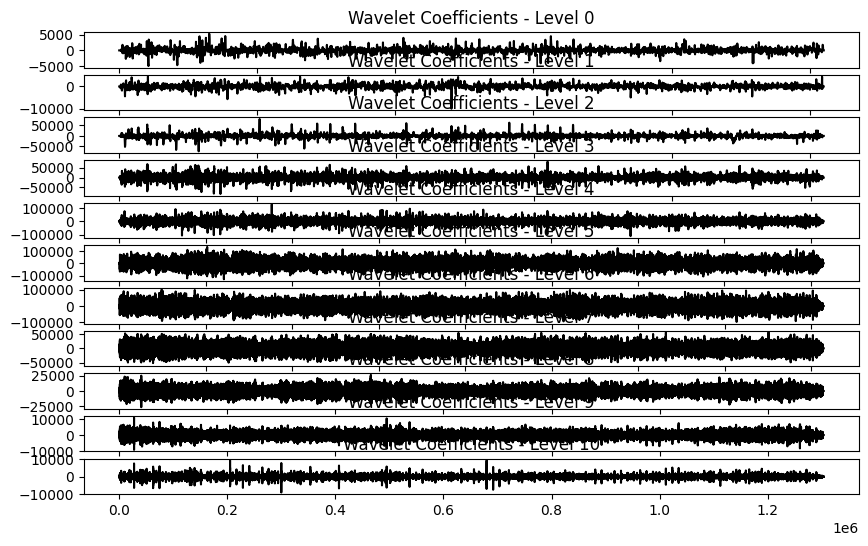

In [2]:
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Perform DWT using Daubechies wavelet
wavelet_name = "db4"
_,y = wavfile.read("monroes.wav")
coeffs = pywt.wavedec(y, wavelet_name, level=10)

# Plot wavelet coefficients at each level
plt.figure(figsize=(10, 6))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff, color='black')
    plt.title(f"Wavelet Coefficients - Level {i}")
plt.tight_layout()
plt.show()

C:\Users\24261951\AppData\Local\Temp\ipykernel_11260\1711856242.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read(file_path)


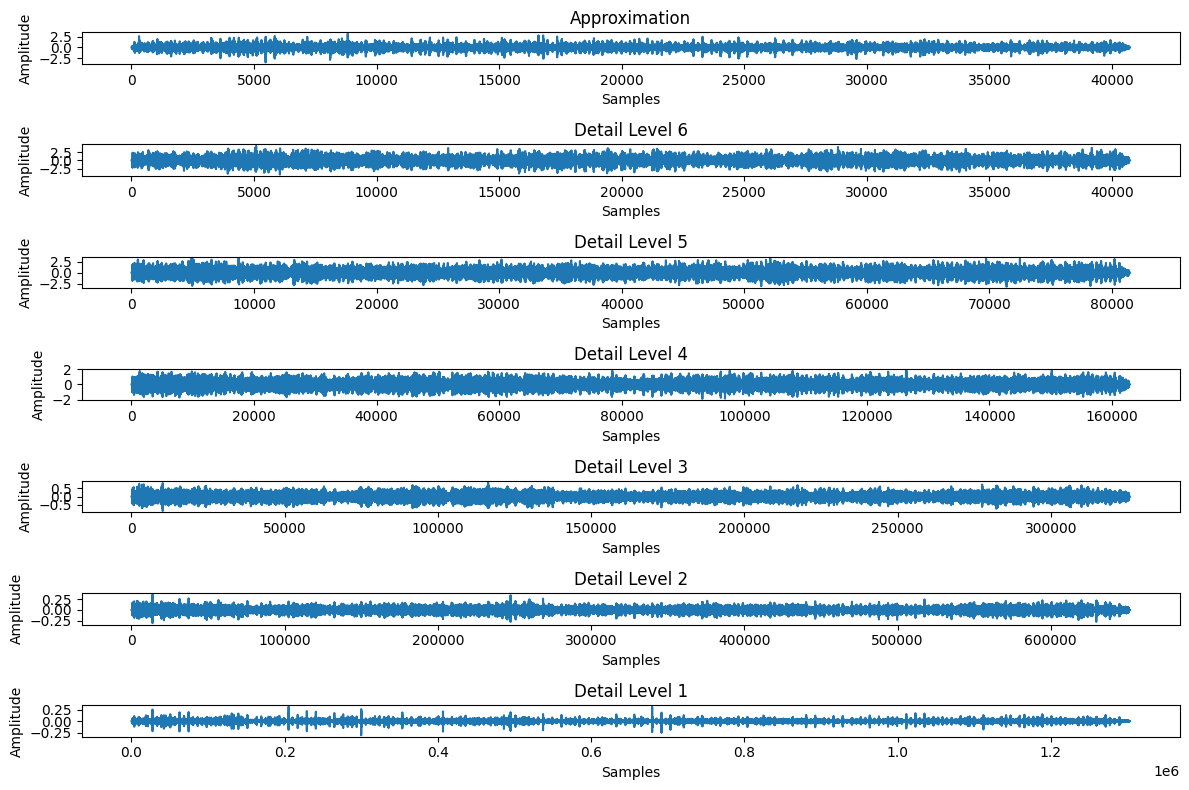

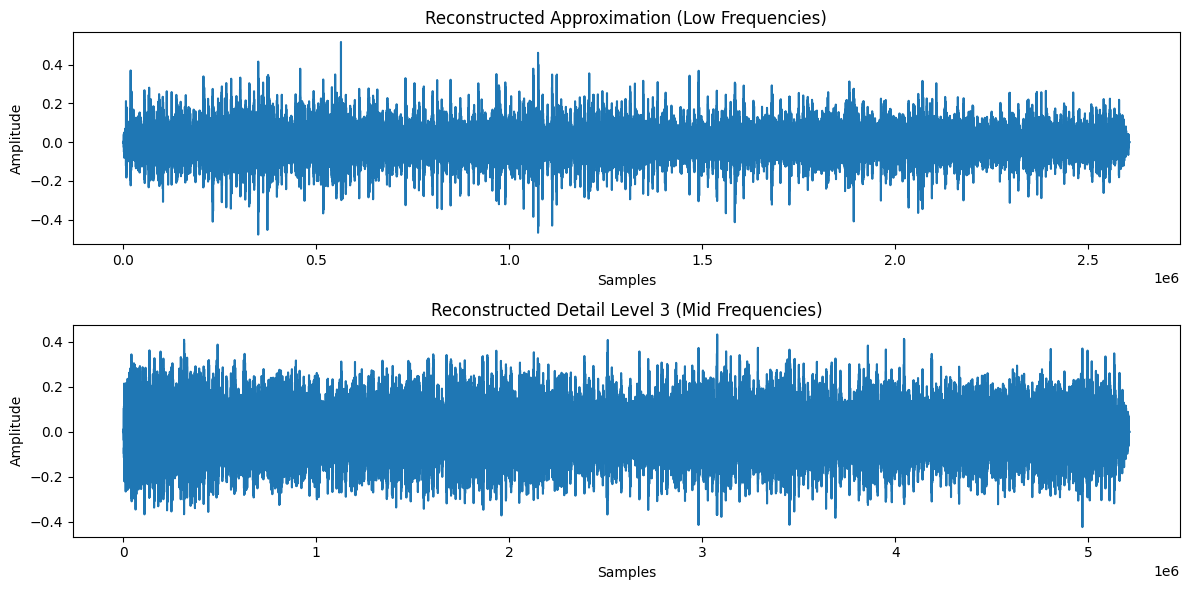

Energy of each level: [9251.647904017615, 36247.95529637436, 38576.81770668461, 22171.853459804675, 5761.553889828594, 794.4177043925989, 246.68022949204052]


In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load an Irish music audio file
file_path = "monroes.wav"  # Replace with your file path
sample_rate, audio_signal = wavfile.read(file_path)

# If stereo, convert to mono
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal.mean(axis=1)

# Normalize the signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Parameters for DWT
wavelet = 'db4'  # Daubechies 4 wavelet (good for music analysis)
level = 6  # Number of decomposition levels

# Perform Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(audio_signal, wavelet, level=level)

# Plot the wavelet coefficients
plt.figure(figsize=(12, 8))
titles = ['Approximation'] + [f'Detail Level {i}' for i in range(level, 0, -1)]
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff)
    plt.title(titles[i])
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Reconstruct specific frequency bands (optional)
# Example: Reconstruct the approximation (low-frequency components)
reconstructed_approx = pywt.waverec([coeffs[0]] + [None] * level, wavelet)

# Example: Reconstruct detail level 3 (mid-frequency components)
reconstructed_detail_3 = pywt.waverec([coeffs[3],None,None,None,None,None], wavelet)

# Plot the reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(reconstructed_approx)
plt.title("Reconstructed Approximation (Low Frequencies)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(reconstructed_detail_3)
plt.title("Reconstructed Detail Level 3 (Mid Frequencies)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Feature extraction: Calculate energy of each level
energy = [np.sum(np.square(coeff)) for coeff in coeffs]
print("Energy of each level:", energy)